# Load Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="EsxEkkAyZF2Nb7L3TQtM")
project = rf.workspace("nguyn-trn-bo-long").project("hand-segment-pnvzg")
version = project.version(2)
dataset = version.download("coco-segmentation")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Hand-Segment-2 in coco-segmentation:: 100%|██████████| 2914/2914 [00:00<00:00, 6097.03it/s]


In [ ]:
import os
import shutil

# Đường dẫn đến thư mục gốc
base_dir = "/content/Hand-Segment-2"

# Các tập dữ liệu cần xử lý
splits = ['train']

for split in splits:
    split_path = os.path.join(base_dir, split)

    # Tạo thư mục images/ và masks/ nếu chưa có
    os.makedirs(os.path.join(split_path, 'images'), exist_ok=True)
    os.makedirs(os.path.join(split_path, 'masks'), exist_ok=True)

    # Duyệt qua các file trong thư mục
    for file_name in os.listdir(split_path):
        file_path = os.path.join(split_path, file_name)

        # Kiểm tra nếu là file ảnh hoặc mask
        if file_name.endswith(".jpg"):
            shutil.move(file_path, os.path.join(split_path, 'images', file_name))
        elif file_name.endswith(".png"):
            shutil.move(file_path, os.path.join(split_path, 'masks', file_name))

print("✅ Đã phân loại xong!")


✅ Đã phân loại xong!


In [ ]:
pip install pycocotools opencv-python


In [ ]:
import os
import json
import numpy as np
import cv2
from pycocotools.coco import COCO

# Đọc annotation file COCO
annotation_file = "/content/Hand-Segment-2/train/_annotations.coco.json"  # Cập nhật đường dẫn nếu cần  #/content/Finger-1/train/_annotations_updated.coco.json
coco = COCO(annotation_file)

# Thư mục đầu vào (ảnh gốc) và đầu ra (mask)
image_dir = "/content/Hand-Segment-2/train/images"
mask_output_dir = "/content/Hand-Segment-2/train/masks"
# Tạo thư mục lưu mask mới
os.makedirs(mask_output_dir, exist_ok=True)

# Duyệt qua từng ảnh trong COCO dataset
for img_id in coco.getImgIds():
    img_info = coco.loadImgs(img_id)[0]
    img_filename = img_info['file_name']

    # Khởi tạo mask với giá trị 0 (background)
    height, width = img_info['height'], img_info['width']
    mask = np.zeros((height, width), dtype=np.uint8)

    # Lấy danh sách các annotation của ảnh này
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)

    # Vẽ từng annotation lên mask
    for ann in anns:
        category_id = ann['category_id']  # Lớp của đối tượng
        segmentation = ann['segmentation']  # Thông tin polygon của đối tượng

        # Vẽ mask từ segmentation
        for seg in segmentation:
            points = np.array(seg, dtype=np.int32).reshape(-1, 2)
            cv2.fillPoly(mask, [points], category_id)  # Dùng category_id làm giá trị pixel

    # Lưu ảnh mask
    mask_filename = os.path.splitext(img_filename)[0] + ".png"
    mask_path = os.path.join(mask_output_dir, mask_filename)
    cv2.imwrite(mask_path, mask)

print("✅ Chuyển đổi hoàn tất! Mask đã được lưu trong thư mục:", mask_output_dir)


loading annotations into memory...
Done (t=0.30s)
creating index...
index created!
✅ Chuyển đổi hoàn tất! Mask đã được lưu trong thư mục: /content/Hand-Segment-2/train/masks


In [ ]:
import os

# Định nghĩa đường dẫn thư mục ảnh và masks
image_dir = "/content/Hand-Segment-2/train/images"  # Đổi path này thành thư mục ảnh gốc của bạn
mask_dir = "/content/Hand-Segment-2/train/masks"    # Đổi path này thành thư mục chứa masks

# Lấy danh sách tên file (không có phần mở rộng)
image_files = {os.path.splitext(f)[0] for f in os.listdir(image_dir)}
mask_files = {os.path.splitext(f)[0] for f in os.listdir(mask_dir)}

print(f"Tổng số ảnh gốc: {len(image_files)}")
print(f"Tổng số masks: {len(mask_files)}")


Tổng số ảnh gốc: 2910
Tổng số masks: 2910


In [ ]:
# Tìm ảnh gốc nhưng không có mask
missing_masks = image_files - mask_files

if missing_masks:
    print(f"Ảnh không có mask: {missing_masks}")
else:
    print("Tất cả ảnh đều có mask.")


Tất cả ảnh đều có mask.


In [ ]:
for file in missing_masks:
    os.remove(os.path.join(image_dir, file + ".jpg"))
print("Đã xóa ảnh không có mask.")


Đã xóa ảnh không có mask.


In [ ]:
import os
import numpy as np
from PIL import Image

mask_dir = "/content/Hand-Segment-2/train/masks"  # Đường dẫn đến thư mục chứa ảnh mask

unique_values_set = set()

# Duyệt qua tất cả các ảnh mask trong thư mục
for mask_file in os.listdir(mask_dir):
    mask_path = os.path.join(mask_dir, mask_file)

    try:
        mask = np.array(Image.open(mask_path))  # Đọc ảnh mask
        unique_values = np.unique(mask)  # Lấy các giá trị pixel duy nhất
        unique_values_set.update(unique_values)  # Thêm vào tập hợp
    except Exception as e:
        print(f"Lỗi khi xử lý {mask_file}: {e}")

print("Các giá trị xuất hiện trong tất cả ảnh mask:", sorted(unique_values_set))


Các giá trị xuất hiện trong tất cả ảnh mask: [np.uint8(0), np.uint8(1)]


In [ ]:
import json

annotation_file = "/content/Hand-Segment-2/train/_annotations.coco.json"

with open(annotation_file, "r") as f:
    data = json.load(f)

categories = data["categories"]
print("Danh sách lớp trong COCO:", [c["id"] for c in categories])


Danh sách lớp trong COCO: [0, 1]


In [ ]:
import json

annotation_file = "/content/Hand-Segment-2/train/_annotations.coco.json"
#/content/Finger-1/train/_annotations.json
with open(annotation_file, "r") as f:
    data = json.load(f)

categories = data["categories"]
for c in categories:
    print(f"ID: {c['id']}, Name: {c['name']}")


ID: 0, Name: back
ID: 1, Name: hand



#Model

In [ ]:
!pip install tensorflow opencv-python matplotlib


In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
import os
import cv2
import numpy as np

image_dir = "/content/Hand-Segment-2/train/images"
mask_dir = "/content/Hand-Segment-2/train/masks"

image_size = (128, 128)  # Resize ảnh cho Unet

X = []  # Lưu ảnh
Y = []  # Lưu mask

for filename in os.listdir(image_dir):
    img_path = os.path.join(image_dir, filename)
    mask_path = os.path.join(mask_dir, filename.replace(".jpg", ".png"))  # Mask có thể là PNG

    # Đọc ảnh & mask
    img = cv2.imread(img_path)
    img = cv2.resize(img, image_size) / 255.0  # Chuẩn hóa ảnh về [0,1]

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Đọc mask ở dạng grayscale
    mask = cv2.resize(mask, image_size)
    mask = mask.astype(np.float32)  # Không cần chia 255 vì mask đã có giá trị 0 hoặc 1
    mask = np.expand_dims(mask, axis=-1)  # Thêm channel để phù hợp với Unet

    X.append(img)
    Y.append(mask)

X = np.array(X)
Y = np.array(Y)

# Kiểm tra giá trị min-max của mask
print(f"Min - Max mask: {Y.min()} - {Y.max()}")
print(f"Số lượng ảnh: {len(X)}, Kích thước ảnh: {X.shape}")
print(f"Số lượng mask: {len(Y)}, Kích thước mask: {Y.shape}")


Min - Max mask: 0.0 - 1.0
Số lượng ảnh: 2910, Kích thước ảnh: (2910, 128, 128, 3)
Số lượng mask: 2910, Kích thước mask: (2910, 128, 128, 1)


## Chia train test valid


In [ ]:
from sklearn.model_selection import train_test_split

# Chia tập dữ liệu thành train (70%) và test+valid (30%)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

# Chia tiếp tập test+valid thành test (15%) và valid (15%)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

print(f"Train: {len(X_train)} ảnh, Validation: {len(X_valid)} ảnh, Test: {len(X_test)} ảnh")


Train: 2037 ảnh, Validation: 436 ảnh, Test: 437 ảnh


## Unet

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def conv_block(x, num_filters):
    x = layers.Conv2D(num_filters, 3, padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(num_filters, 3, padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    return x

def encoder_block(x, num_filters):
    x = conv_block(x, num_filters)
    p = layers.MaxPooling2D((2, 2))(x)
    return x, p

def decoder_block(x, skip, num_filters):
    x = layers.Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(x)
    x = layers.Concatenate()([x, skip])
    x = conv_block(x, num_filters)
    return x

def build_unet(input_shape):
    inputs = layers.Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b = conv_block(p4, 1024)

    d1 = decoder_block(b, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = layers.Conv2D(1, 1, activation="sigmoid")(d4)

    model = keras.Model(inputs, outputs, name="U-Net")
    return model

# Tạo và biên dịch mô hình
unet_model = build_unet((128, 128, 3))
unet_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                    loss="binary_crossentropy", metrics=["accuracy"])

# Hiển thị kiến trúc mô hình
unet_model.summary()



# Tạo ImageDataGenerator để tăng cường dữ liệu


# Định nghĩa EarlyStopping và ReduceLROnPlateau nếu chưa có




Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 128, 128, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 128, 128, 64)   │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 64)     │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 64, 64, 128)    │            512 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 128)    │        147,584 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 64, 64, 128)    │            512 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 128)    │              0 │ batch_normalization_3… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 32, 32, 256)    │          1,024 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 32, 256)    │        590,080 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 32, 32, 256)    │          1,024 │ conv2d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2      

 Total params: 31,055,297 (118.47 MB)

 Trainable params: 31,043,521 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

In [ ]:
# Khai báo EarlyStopping và ReduceLROnPlateau
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)

# Huấn luyện mô hình
history = unet_model.fit(
    X_train, Y_train,
    validation_data=(X_valid, Y_valid),
    epochs=20,  # Tăng epochs để kiểm tra hội tụ
    batch_size=8,  # Giữ nguyên batch_size phù hợp với tài nguyên
    callbacks=[early_stopping, reduce_lr],  # Dừng sớm + Giảm LR
    verbose=1
)

# Lưu mô hình dưới dạng file .h5
unet_model.save("unet_model.h5")



Epoch 1/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 111s 286ms/step - accuracy: 0.9187 - loss: 0.1986 - val_accuracy: 0.4706 - val_loss: 1.5770 - learning_rate: 1.0000e-04
Epoch 2/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 40s 156ms/step - accuracy: 0.9735 - loss: 0.0744 - val_accuracy: 0.8087 - val_loss: 0.5235 - learning_rate: 1.0000e-04
Epoch 3/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 41s 156ms/step - accuracy: 0.9779 - loss: 0.0611 - val_accuracy: 0.9752 - val_loss: 0.0659 - learning_rate: 1.0000e-04
Epoch 4/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 41s 155ms/step - accuracy: 0.9790 - loss: 0.0568 - val_accuracy: 0.9797 - val_loss: 0.0546 - learning_rate: 1.0000e-04
Epoch 5/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 41s 154ms/step - accuracy: 0.9810 - loss: 0.0511 - val_accuracy: 0.9791 - val_loss: 0.0549 - learning_rate: 1.0000e-04
Epoch 6/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 40s 155ms/step - accuracy: 0.9813 - loss: 0.0489 - val_accuracy: 0.9805 - val_loss: 0.0513 - learning_rate: 1.0000e-04
Epoch 7/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 41s 1

## Đánh giá

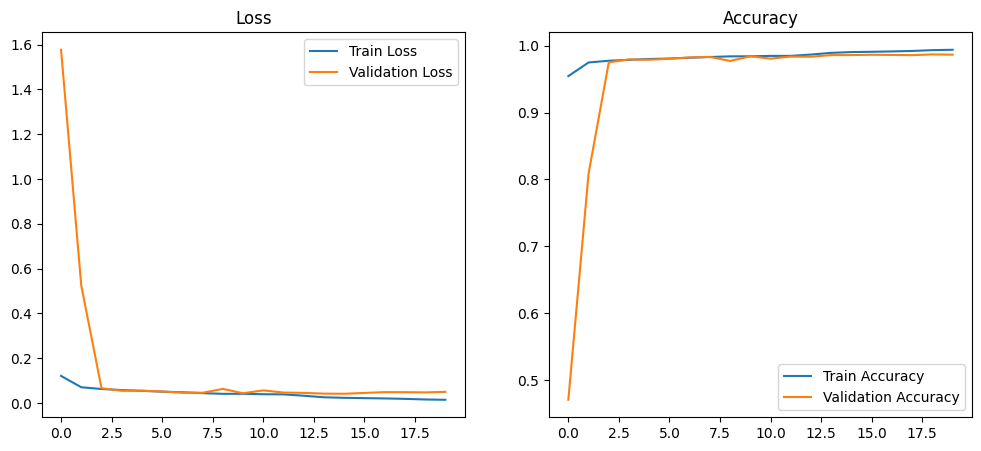

14/14 ━━━━━━━━━━━━━━━━━━━━ 26s 988ms/step


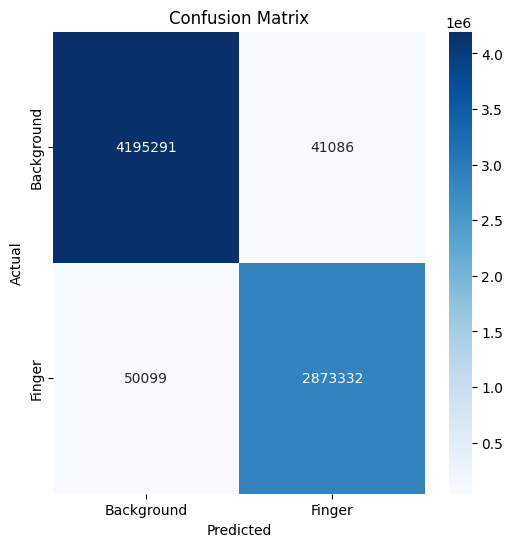

Classification Report:
              precision    recall  f1-score   support

  Background       0.99      0.99      0.99   4236377
      Finger       0.99      0.98      0.98   2923431

    accuracy                           0.99   7159808
   macro avg       0.99      0.99      0.99   7159808
weighted avg       0.99      0.99      0.99   7159808



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Vẽ biểu đồ loss và accuracy
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Loss
    ax[0].plot(history.history["loss"], label="Train Loss")
    ax[0].plot(history.history["val_loss"], label="Validation Loss")
    ax[0].set_title("Loss")
    ax[0].legend()

    # Accuracy
    ax[1].plot(history.history["accuracy"], label="Train Accuracy")
    ax[1].plot(history.history["val_accuracy"], label="Validation Accuracy")
    ax[1].set_title("Accuracy")
    ax[1].legend()

    plt.show()

# Dự đoán trên tập test
def evaluate_model(model, X_test, Y_test):
    Y_pred = model.predict(X_test)
    Y_pred = (Y_pred > 0.5).astype(np.uint8)  # Chuyển thành mask nhị phân

    # Flatten để tính toán ma trận nhầm lẫn
    Y_test_flat = Y_test.flatten()
    Y_pred_flat = Y_pred.flatten()

    # Ma trận nhầm lẫn
    cm = confusion_matrix(Y_test_flat, Y_pred_flat)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Background", "Finger"], yticklabels=["Background", "Finger"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # Precision, Recall, F1-score
    print("Classification Report:")
    print(classification_report(Y_test_flat, Y_pred_flat, target_names=["Background", "Finger"]))

# Gọi hàm đánh giá sau khi train
plot_history(history)  # history là biến chứa lịch sử training từ model.fit()
evaluate_model(unet_model, X_test, Y_test)  # X_test, Y_test là tập test của bạn


## Kiểm tra X_test

14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 279ms/step


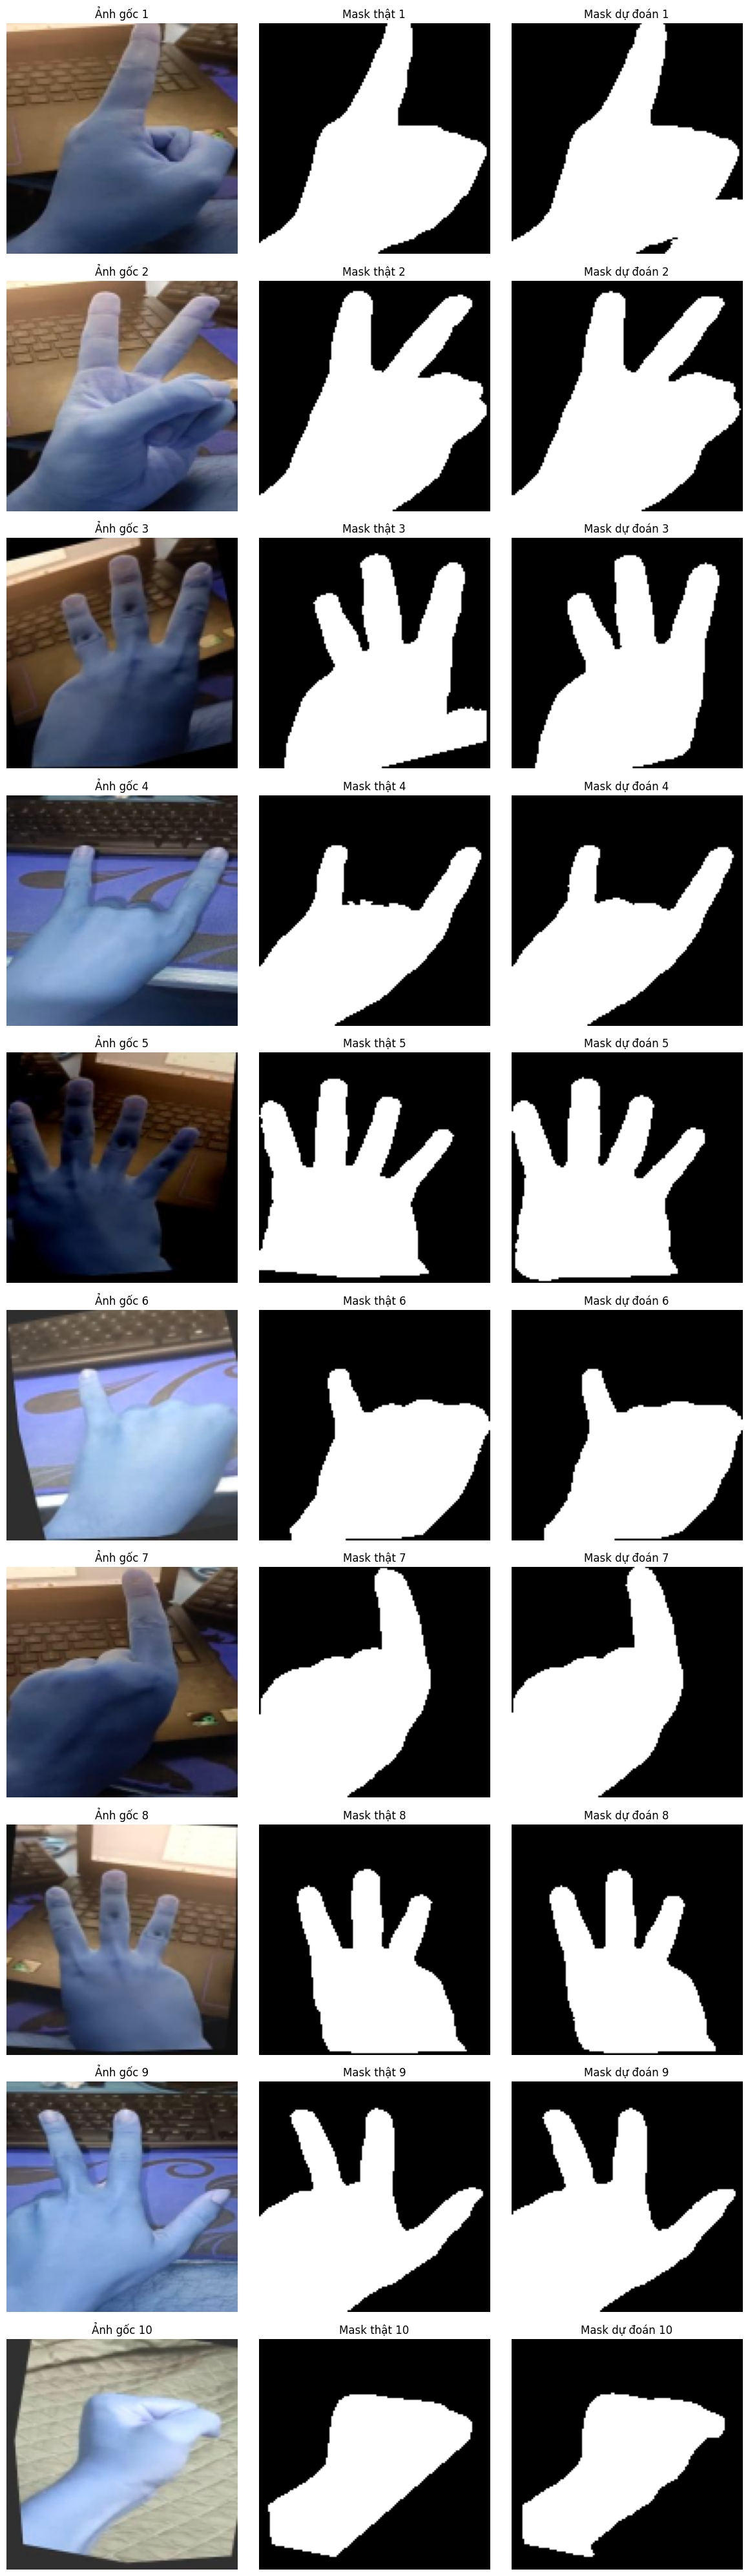

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

model_path = "/content/unet_model.h5"  # Thay đường dẫn thực tế nếu cần

# Load mô hình U-Net
unet_model = tf.keras.models.load_model(model_path)

# Dự đoán toàn bộ tập test
pred_masks = unet_model.predict(X_test)

# Chuyển kết quả về 0 hoặc 1 (ngưỡng phân loại)
pred_masks = (pred_masks > 0.5).astype(np.uint8)

# Số ảnh muốn hiển thị
num_images = min(10, len(X_test))  # Giới hạn tối đa 10 ảnh để hiển thị

# Tạo lưới hiển thị với 3 cột: ảnh gốc, mask thật, mask dự đoán
fig, axes = plt.subplots(num_images, 3, figsize=(12, 4 * num_images))

for i in range(num_images):
    sample_image = X_test[i]  # Giữ nguyên giá trị gốc
    sample_mask = np.squeeze(Y_test[i], axis=-1)  # Loại bỏ chiều cuối nếu có
    pred_mask = np.squeeze(pred_masks[i], axis=-1)  # Loại bỏ chiều cuối nếu có

    # Kiểm tra số kênh của ảnh
    if sample_image.shape[-1] == 1:  # Nếu ảnh grayscale
        sample_image = np.squeeze(sample_image, axis=-1)  # Loại bỏ kênh cuối
        cmap_type = "gray"
    else:
        cmap_type = None  # Ảnh màu RGB không cần cmap

    # Hiển thị ảnh gốc
    axes[i, 0].imshow(sample_image, cmap=cmap_type)
    axes[i, 0].set_title(f"Ảnh gốc {i+1}")
    axes[i, 0].axis("off")

    # Hiển thị mask thật
    axes[i, 1].imshow(sample_mask, cmap="gray")
    axes[i, 1].set_title(f"Mask thật {i+1}")
    axes[i, 1].axis("off")

    # Hiển thị mask dự đoán
    axes[i, 2].imshow(pred_mask, cmap="gray")
    axes[i, 2].set_title(f"Mask dự đoán {i+1}")
    axes[i, 2].axis("off")

plt.tight_layout()
plt.show()
